Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mimg

%matplotlib inline

Show image

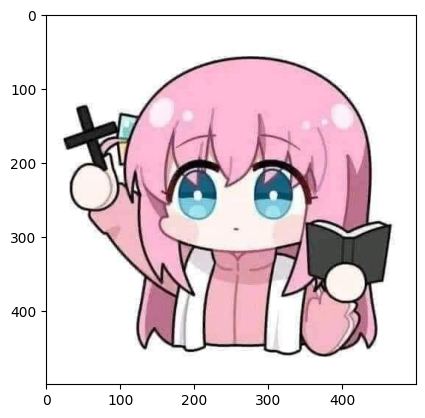

In [2]:
image = Image.open("Bocchi.jpg")

def display_image(image):
    plt.imshow(image)
    plt.show()

display_image(image)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

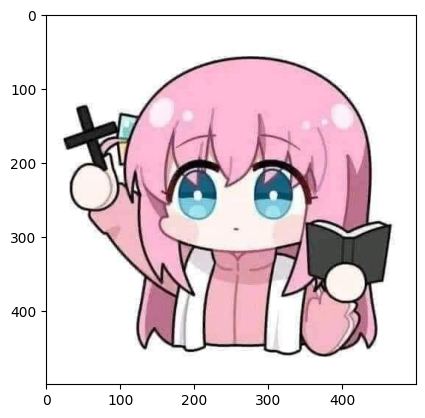

In [3]:
plt.imshow(np.array(image))
np.array(image)

Change brightness

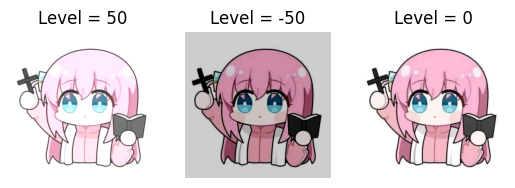

In [4]:
def change_brightness(image, level):
    
    def brightness(c: int) -> float:
        return 128 + level + (c - 128)
    
    if not -255.0 <= level <= 255.0:
        raise ValueError("Level must be between -255.0 and 255.0")
    
    img = image.point(brightness)
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title(f"Level = {level}")
    if (level > 0):
        img.save('brightened_image.png')
    elif (level < 0): 
        img.save('darkened_image.png')
    else: 
        img.save('original_image.png')

rows, cols = 1, 3
level = [50 , -50 , 0]
for index,l in enumerate(level, start = 1):
    plt.subplot(rows, cols, index) 
    change_brightness(image, l)


Change contrast

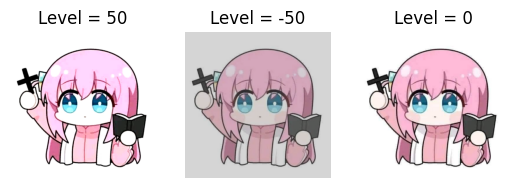

In [5]:
def change_contrast(image, level):
    
    factor = (259 * (level + 255)) / (255 * (259 - level))
    
    def contrast(c: int) -> int:
        return int(128 + factor * (c - 128))
    
    if not -255.0 <= level <= 255.0:
        raise ValueError("Level must be between -255.0 and 255.0")

    img = image.point(contrast)
    plt.imshow(np.array(img))
    plt.title(f"Level = {level}")
    plt.axis('off')
    if (level > 0):
        img.save('more_contrast_image.png')
    elif (level < 0): 
        img.save('less_contrast_image.png')
    else: 
        img.save('original_image.png')

rows, cols = 1, 3
level = [50 , -50 , 0]
for index,l in enumerate(level, start = 1):
    plt.subplot(rows, cols, index) 
    change_contrast(image, l)


Flipping image

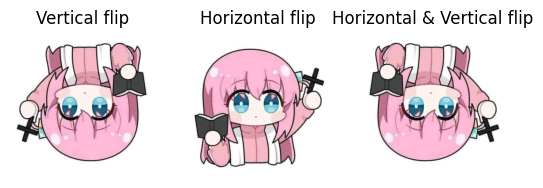

In [6]:
def flip_vertical(image):
    img = np.array(image)
    vertical_image = np.flipud(img)
    plt.imshow(np.array(vertical_image))
    plt.title("Vertical flip")
    mimg.imsave("vertical_image.png", vertical_image)

def flip_horizontal(image):    
    img = np.array(image)
    horizontal_image = np.fliplr(img)
    plt.imshow(np.array(horizontal_image))
    plt.title("Horizontal flip")
    mimg.imsave("horizontal_image.png", horizontal_image)

def flip_hori_ver(image):
    img = np.array(image)
    hori_ver_image = np.flip(img, (0, 1))
    plt.imshow(np.array(hori_ver_image))
    plt.title("Horizontal & Vertical flip")
    mimg.imsave("hori_ver_image.png", hori_ver_image)

rows, cols = 1, 3
plt.subplot(rows, cols, 1)
plt.axis('off')
flip_vertical(image)
plt.subplot(rows,cols, 2)
plt.axis('off')
flip_horizontal(image)
plt.subplot(rows,cols, 3)
plt.axis('off')
flip_hori_ver(image)


Convert RGB to grayscale

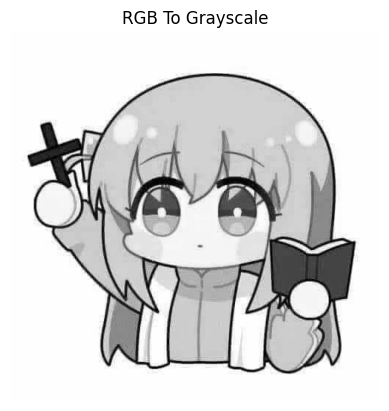

In [7]:
def grayscale(image):
   img = np.array(image)
   img = img / img.max()    
   R, G, B = img[...,0], img[...,1], img[...,2]
   img_out = np.dstack((0.2989 * R + 0.5870 * G + 0.1140 * B, \
                        0.2989 * R + 0.5870 * G + 0.1140 * B, \
                        0.2989 * R + 0.5870 * G + 0.1140 * B))
   img_out = np.clip(img_out, 0, 1)
   gray_img = (255*img_out).astype(np.uint8)
   plt.imshow(np.array(gray_img), cmap = 'gray', vmin=0, vmax=255)
   plt.title("RGB To Grayscale")
   plt.axis('off')
   mimg.imsave("gray_image.png",gray_img)

grayscale(image)

Convert RGB to sepia

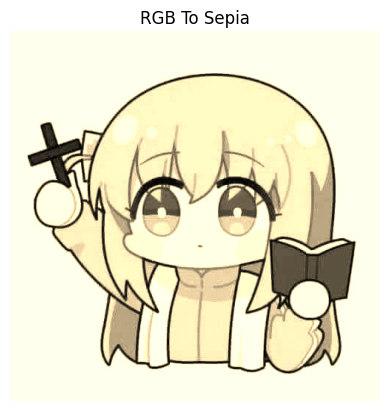

In [8]:
def sepia(image):
    img = np.array(image)
    img = img / img.max()    
    R, G, B = img[...,0], img[...,1], img[...,2]
    img_out = np.dstack((0.393 * R + 0.769 * G + 0.189 * B, \
                        0.349 * R + 0.686 * G + 0.168 * B, \
                        0.272 * R + 0.534 * G + 0.131 * B))
    img_out = np.clip(img_out, 0, 1)
    sepia_img = (255*img_out).astype(np.uint8)
    plt.imshow(sepia_img)
    plt.title("RGB To Sepia")
    plt.axis('off')
    mimg.imsave("sepia_image.png",sepia_img)

sepia(image)


List of kernels

In [9]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
blur = np.array([[0.0625, 0.125, 0.0625],
                [0.125, 0.25, 0.125],
                [0.0625, 0.125, 0.0625]])
box_blur = np.array([[0.1111, 0.1111, 0.1111],
                     [0.1111, 0.1111, 0.1111],
                     [0.1111, 0.1111, 0.1111]])
gaussian_blur = np.array([[0.0625, 0.125, 0.0625],
                          [0.125, 0.25, 0.125],
                          [0.0625, 0.125, 0.0625]])

Convolve function

In [10]:
def convolve(image, kernel):
    image = np.array(image).astype(float)/255
    i_width, i_height = image.shape[0], image.shape[1]
    k_width, k_height = kernel.shape[0], kernel.shape[1]
    filtered = np.zeros_like(image)
    kernel_sum = kernel.sum()

    for x in range(i_width):
        for y in range(i_height):
            weighted_pixel_sum = 0

            for kx in range(-(k_width // 2), k_width - 1):
                for ky in range(-(k_height // 2), k_height - 1):
                    pixel = 0
                    pixel_x = x - kx
                    pixel_y = y - ky
                    if (pixel_y >= 0) and (pixel_y < i_height) and (pixel_x >= 0) and (pixel_x < i_width):
                       pixel = image[pixel_x, pixel_y]
                    weight = kernel[ky + (k_height // 2), kx + (k_width // 2)]

                    weighted_pixel_sum += pixel * weight
            filtered[x, y] = weighted_pixel_sum / kernel_sum
   
    filtered = np.clip(filtered, 0, 1)
    return filtered


Sharpen image

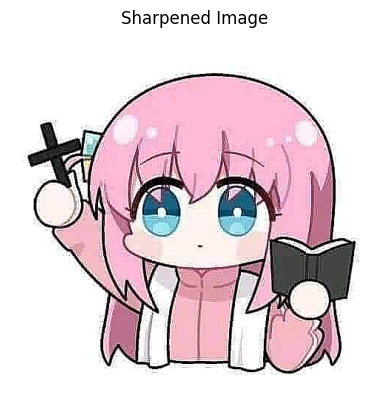

In [11]:
def sharpen_img(image):
    img = np.array(image)
    sharpened_image = convolve(img, sharpen)
    plt.imshow(sharpened_image)
    plt.title("Sharpened Image")
    plt.axis('off')
    mimg.imsave("sharpened_image.png",sharpened_image)

sharpen_img(image)

Blur image

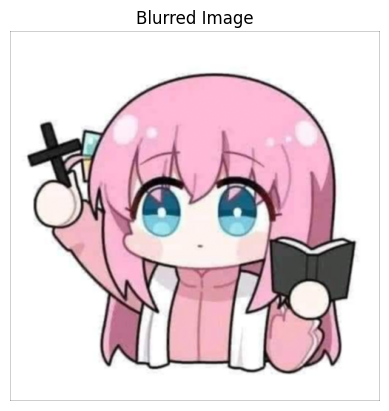

In [12]:
def blur_img(image):
    img = np.array(image)
    blurred_image = convolve(img, blur)
    plt.imshow(blurred_image)
    plt.title("Blurred Image")
    plt.axis('off')
    mimg.imsave("blurred_image.png",blurred_image)

blur_img(image)

Crop center

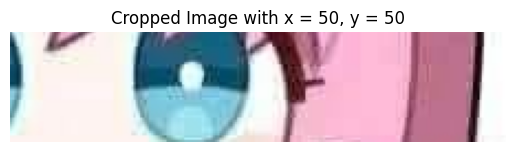

In [13]:
def crop_center(image, cropx, cropy):
    img = np.array(image)
    
    x, y, _ = img.shape
    startx = x // 2 - (cropx // 2)
    starty = y // 2 - (cropy // 2)
    crop_img = img[startx: -startx, starty:-cropy, :]
    plt.title(f"Cropped Image with x = {cropx}, y = {cropy}")
    plt.imshow(crop_img)
    plt.axis('off')
    mimg.imsave("Center-cropped_image.png",crop_img)

crop_center(image,50,50)


Crop circular

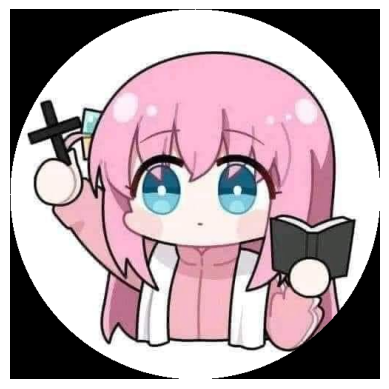

In [14]:
def crop_circle(image):
    img = np.array(image)
    h, w = img.shape[:2]
    mask = create_circular_mask(h, w)
    masked_img = img.copy()
    masked_img[~mask] = 0
    plt.imshow(masked_img)
    plt.axis('off')
    mimg.imsave("center-cropped_image.png",masked_img)


def create_circular_mask(h, w, center=None, radius=None):
    if center is None: # Use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # Use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    y, x = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((x - center[0])**2 + (y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

crop_circle(image)

Crop ellipse

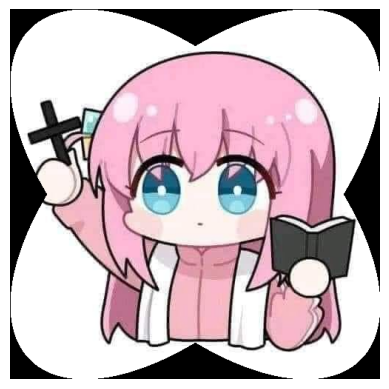

In [15]:
def create_ellipse_mask(h, w, center=None, radius=None):
    if center is None: # Use the middle of the image
        center = (int(w/2), int(h/2))
    a = 500/np.sqrt(2) * np.cos(90)
    b = 500/np.sqrt(2) * np.sin(90)
    y, x = np.ogrid[:h, :w]
    dist_from_center1 = np.sqrt((a**2 + b**2)*((x - center[0])**2 + (y-center[1])**2) + 2*((b**2 - a**2))*((x - center[0]))*(y-center[1]))
    dist_from_center2 = np.sqrt((a**2 + b**2)*((x - center[0])**2 + (y-center[0])**2) + 2*((a**2 - b**2))*((x - center[0]))*(y-center[0]))
    mask1 = dist_from_center1 < np.sqrt(2*((a*b)**2))
    mask2 = dist_from_center2 < np.sqrt(2*((a*b)**2))
    return mask1 + mask2

def crop_ellipse(image):
    img = np.array(image)
    h, w = img.shape[:2]
    mask = create_ellipse_mask(h, w)
    masked_img = img.copy()
    masked_img[~mask] = 0
    plt.imshow(masked_img)
    plt.axis('off')
    mimg.imsave("ellipse_image.png",masked_img)

crop_ellipse(image)

Main function:

1. Change brightness of image
2. Change contrast of image
3. Flip image
4. Convert image to grayscale/sepia
5. Sharpen/Blur image
6. Crop center of image
7. Crop image into circle
8. Crop image with 2 ellipses
0. Execute all features


AttributeError: 'list' object has no attribute 'get'

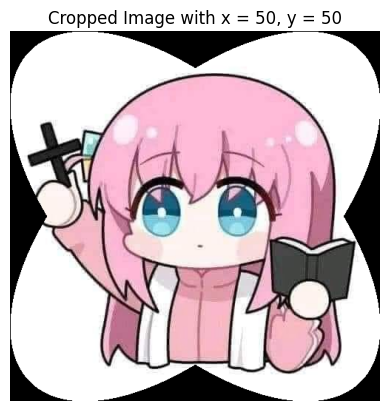

In [23]:
import os

if __name__ == '__main__':
    filename = input("Enter filename: ")
    image = Image.open(filename)

    choice = 9  
    while (choice < 0 or choice > 8): 
        print("1. Change brightness of image")
        print("2. Change contrast of image")
        print("3. Flip image")
        print("4. Convert image to grayscale/sepia")
        print("5. Sharpen/Blur image")
        print("6. Crop center of image")
        print("7. Crop image into circle")
        print("8. Crop image with 2 ellipses")
        print("0. Execute all features")
        choice = int(input('Enter the feature (default = 0): '))
        os.system('cls')
        if choice == 1:
            level = int(input('Enter brightness level (-255 to 255): '))
            change_brightness(image, level)
            break
        elif choice == 2:
            level = int(input('Enter contrast level (-255 to 255): '))
            change_contrast(image, level)
            break
        elif choice == 3:
            flip_choice = int(input('Enter flip choice: '))
            print("1. Flip vertically")
            print("2. Flip horizontally")
            print("3. Flip horizontally and vertically")
            flip_list = {
                1:  flip_vertical(image),
                2:  flip_horizontal(image),
                3:  flip_hori_ver(image)
            }
            flip_choice.get(flip_list)
            break
        elif choice == 4:
            color_choice = int(input('Enter color choice: '))
            print("1. Grayscale")
            print("2. Sepia")
            color_list = {
                1: grayscale(image),
                2: sepia(image),
            }
            color_list.get(color_choice)
            break
        elif choice == 5:
            sb = int(input('Choose between sharpen and blur image: '))
            print("1. Blur")
            print("2. Sharpen")
            sb_list = {
            1:  sharpen_img(image),
            2:  blur_img(image)
            }
            sb_list.get(sb)
            break
        elif choice == 6:
            cropx = int(input('Enter crop x: '))
            cropy = int(input('Enter crop y: '))
            crop_center(image, cropx, cropy)
            break
        elif choice == 7:
            crop_circle(image)
            break
        elif choice == 8:
            crop_ellipse(image)
            break
        elif choice == 0:
            change_brightness(image, 100)
            change_contrast(image, 100)
            flip_vertical(image)
            flip_horizontal(image)
            flip_hori_ver(image)
            grayscale(image)
            sepia(image)
            sharpen_img(image)
            blur_img(image)
            crop_center(image, 50, 50)
            crop_circle(image)
            crop_ellipse(image)
            os.system('cls')
            print("All processes finished")
            break
        else: 
            print("Invalid option, please re-enter:" )
        
